In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
import math

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Описание данных

СUSTOMER

customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

ORDERS

order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

ITEMS

order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

# Импорт

In [2]:
customer = pd.read_csv('/Users/vitaly/Downloads/olist_customers_dataset.csv')

In [3]:
orders = pd.read_csv('/Users/vitaly/Downloads/olist_orders_dataset.csv', parse_dates = ['order_purchase_timestamp', 
                                                                                        'order_approved_at',
                                                                                        'order_delivered_carrier_date',
                                                                                        'order_delivered_customer_date',
                                                                                        'order_estimated_delivery_date'])

In [4]:
items = pd.read_csv('/Users/vitaly/Downloads/olist_order_items_dataset.csv', parse_dates = ['shipping_limit_date'])

# EDA

## Сustomer

In [5]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customer.describe(include = 'object')

# наиболее частый штат - SP; город - sao paulo

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [7]:
customer.shape

(99441, 5)

In [8]:
customer.isna().sum()

# пропусков нет

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

## Orders

In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [10]:
orders.describe()

# уникальный идентификатор заказа действительно уникален

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [11]:
orders.shape

(99441, 8)

In [12]:
orders.isna().sum()

# пропуски есть в незначительном количестве и скорее всего у тех заказов, которые были недоставлены и т.д. 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## Items

In [13]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
items.describe()

# в записи цен ошибок нет: минимальная цена не отрицательная, остальные показатели адекватны

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [15]:
items.shape

(112650, 7)

In [16]:
items.isna().sum()

# пропусков нет

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

# Исследование

## Что считать покупкой?

Посмотрим на статусы заказов

In [17]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Посмотрим на записи о доставленных заказах (order_status = delivered)

In [18]:
orders[orders.order_status == 'delivered'].isna().sum()

# посмотрим на доставленные заказы, но с пропусками

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [19]:
orders[(orders.isnull().any(axis=1)) & (orders.order_status == 'delivered')]

# сочтём за ошибку фиксации информации

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22


In [20]:
print('заказы со статусом "доставлено" составляют {}% всех заказов'
                .format(round((orders[orders.order_status == 'delivered'].shape[0] /  \
                               orders.shape[0]) * 
                               100,
                              1)))

заказы со статусом "доставлено" составляют 97.0% всех заказов


Исходя из того, что 97% заказов имеют статус "доставлено", ПОКУПКОЙ будем считать именно такие заказы, поскольку при иных статусах мы необладаем информацией о возврате средств или прочих действиях при отмене заказа. К тому же данные устроены таким образом, что отображается последний статус заказа, поэтому важно именно то, что заказ доставлен, а не отгружен и т.д. Мы не знаем, что произошло с заказом потом.

In [21]:
# отдельный df для работы с ПОКУПКАМИ

delivered_orders = orders[orders.order_status == 'delivered']

## Пользователи с одной покупкой

Объединим таблицы customers и orders 

In [22]:
full_delivered_orders = customer.merge(delivered_orders, on = 'customer_id')

In [23]:
full_delivered_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [24]:
full_delivered_orders.shape

# все записи сохранились

(96478, 12)

Выберем столбец определяющий именно покупателя, чтобы по нему сгруппировать данные. По смыслу нам подходит customer_unique_id

In [25]:
full_delivered_orders.customer_unique_id.nunique()

93358

Сгруппируем данные по пользователям и определим кол-во пользователей, которые совершали покупку только 1 раз

In [26]:
full_delivered_orders.groupby('customer_unique_id').agg({'customer_id': 'count'}) \
                                         .rename(columns = {'customer_id': 'count_of_orders'}) \
                                         .query('count_of_orders == 1') \
                                         .shape[0]

# кол-во покупателей, совершивших только одну покупку = 90557

90557

## Среднее кол-во недоставляемых заказов в месяц (разбивка по причине)

Отберём недоставленные заказы, то есть те, которые не могли закончится успехом: недоступные (unavailable) и отменённые (canceled)

In [27]:
unsuc_orders = orders[orders.order_status.isin(['unavailable', 'canceled'])]

In [28]:
unsuc_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05


In [29]:
unsuc_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 141
order_delivered_carrier_date     1159
order_delivered_customer_date    1228
order_estimated_delivery_date       0
dtype: int64

Посмотрим на распределение статусов заказов за всё время

In [30]:
unsuc_orders_grouped_by_reason = unsuc_orders.groupby('order_status') \
                        .agg({'order_id': 'count'}) \
                        .rename(columns = {'order_id': 'count_of_orders'}) \
                        .sort_values('count_of_orders', ascending = False)

In [31]:
unsuc_orders_grouped_by_reason

,count_of_orders
order_status,
canceled,625
unavailable,609


<AxesSubplot:xlabel='order_status', ylabel='count'>

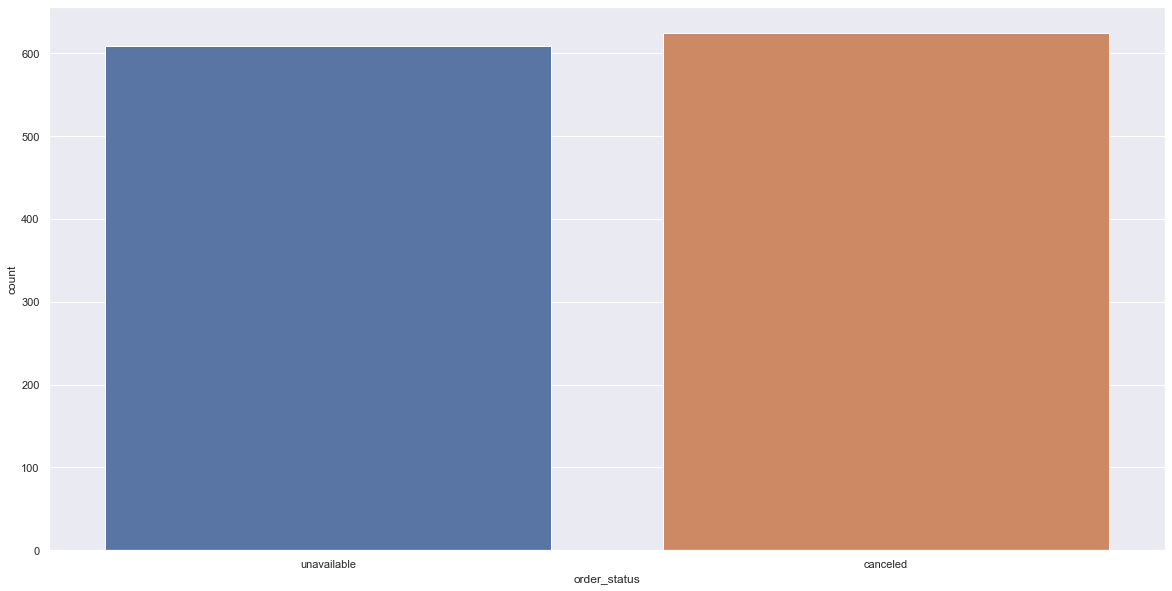

In [32]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot('order_status', data = unsuc_orders)

Исследуем динамику по месяцам с учётом года

Выберем столбец для извлечения из него месяца. Пропусков нет в дате создания заказа и обещанной дате доставки. Разумно выбрать дату создания заказа, потому что обещанная дата доставки зависит от города доставки и может быть слишком большой / маленькой, в то время как заказ создаётся онлайн.

Извлекаю месяц с годом

In [33]:
unsuc_orders['month_of_order_purchase'] = unsuc_orders['order_purchase_timestamp'].dt.to_period('M')

In [34]:
unsuc_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_of_order_purchase
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,2017-11
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,2018-08
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,2018-01
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,2018-01
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2017-08


Группируем по месяцу создания заказа и статусу заказа, считаю количество заказов

In [35]:
unsuc_orders_by_month = unsuc_orders.groupby(['month_of_order_purchase', 'order_status'], as_index = False) \
                                                .agg({'order_id': 'count'})
unsuc_orders_by_month

,month_of_order_purchase,order_status,order_id
0,2016-09,canceled,2
1,2016-10,canceled,24
2,2016-10,unavailable,7
3,2017-01,canceled,3
4,2017-01,unavailable,10
5,2017-02,canceled,17
6,2017-02,unavailable,45
7,2017-03,canceled,33
8,2017-03,unavailable,32
9,2017-04,canceled,18


Создаём сводную таблицу, где колонками становятся месяца, а в значениях - количество заказов со статусом заказа из индекса

In [36]:
pivot_unsuc_orders_by_month = unsuc_orders_by_month.pivot(columns = 'month_of_order_purchase', 
                                                            index = 'order_status', 
                                                           values = 'order_id')
pivot_unsuc_orders_by_month

month_of_order_purchase,2016-09,2016-10,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
order_status,,,,,,,,,,,,,,,,,,,,,
canceled,2.0,24.0,3.0,17.0,33.0,18.0,29.0,16.0,28.0,27.0,...,34.0,73.0,26.0,15.0,24.0,18.0,41.0,84.0,15.0,4.0
unavailable,NaN,7.0,10.0,45.0,32.0,9.0,31.0,24.0,52.0,32.0,...,48.0,30.0,17.0,5.0,16.0,4.0,18.0,7.0,NaN,NaN


In [37]:
pivot_unsuc_orders_by_month['mean'] = pivot_unsuc_orders_by_month.mean(axis=1).round(0)

In [38]:
pivot_unsuc_orders_by_month

# среднее по месяцам с разбивкой по причине представлено в столбце mean 

month_of_order_purchase,2016-09,2016-10,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,mean
order_status,,,,,,,,,,,,,,,,,,,,,
canceled,2.0,24.0,3.0,17.0,33.0,18.0,29.0,16.0,28.0,27.0,...,73.0,26.0,15.0,24.0,18.0,41.0,84.0,15.0,4.0,26.0
unavailable,NaN,7.0,10.0,45.0,32.0,9.0,31.0,24.0,52.0,32.0,...,30.0,17.0,5.0,16.0,4.0,18.0,7.0,NaN,NaN,29.0


Визуализируем

In [39]:
pivot_unsuc_orders_by_month_reseted_indexes = pivot_unsuc_orders_by_month.reset_index() \
                                                        .sort_values('mean', ascending = False)

<AxesSubplot:xlabel='order_status', ylabel='mean'>

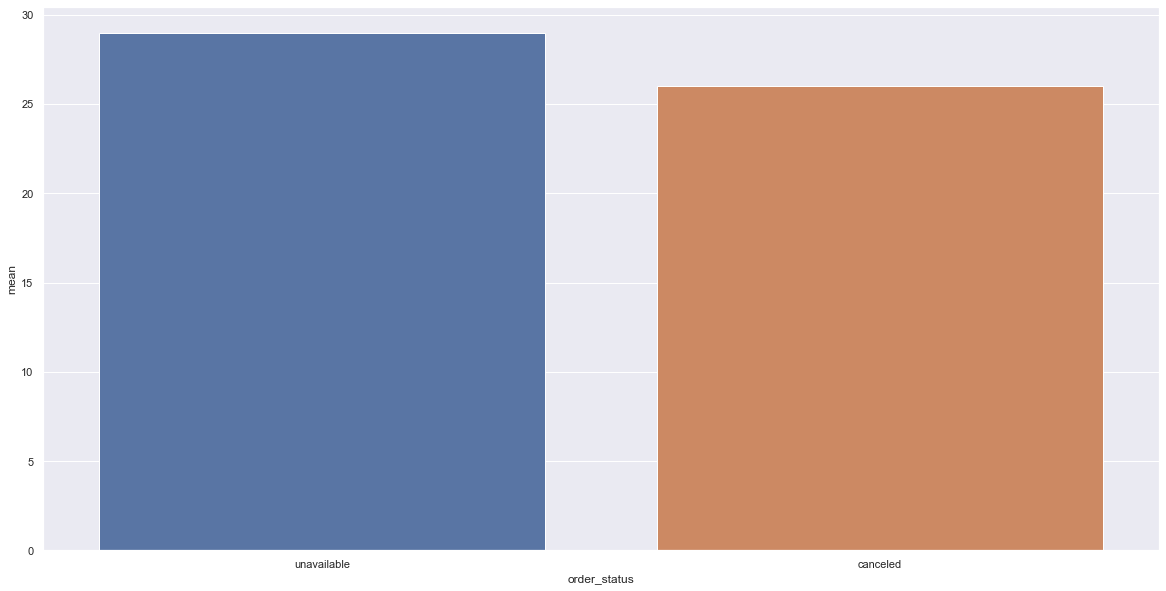

In [40]:
sns.barplot(y = 'mean', x = 'order_status', data = pivot_unsuc_orders_by_month_reseted_indexes)

## Частота покупки товаров по дням недели

Объединим таблицу заказов с успешными покупками с товарами внутри

In [41]:
orders_and_items = items.merge(delivered_orders, on = 'order_id')

In [42]:
orders_and_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [43]:
orders_and_items.isna().sum()

order_id                          0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

Создадим колонку с днём недели создания заказа

In [44]:
orders_and_items['weekday'] = orders_and_items['order_purchase_timestamp'].dt.weekday

Cгруппируем по ID продукта и дням недели, посчитав кол-во заказов

In [45]:
products_by_weekdays = orders_and_items.groupby(['product_id', 'weekday'], as_index = False) \
                                                     .agg({'order_id': 'count'}) \
                                                     .rename(columns = {'order_id': 'count_of_orders'}) \
                                                     .sort_values('count_of_orders', ascending = False)

In [46]:
products_by_weekdays

# по этой таблице можно посмотреть кол-во заказов по каждому продукту и по дням недели (сортировка по убыванию)

,product_id,weekday,count_of_orders
15593,422879e10f46682990de24d770e7f83d,2,93
35750,99a4788cb24856965c36a24e339b6058,0,91
40182,aca2eb7d00ea1a7b8ebd4e68314663af,3,89
40180,aca2eb7d00ea1a7b8ebd4e68314663af,1,85
40183,aca2eb7d00ea1a7b8ebd4e68314663af,4,83
...,...,...,...
23487,6413f7a28e149a324c4a914000399fb2,3,1
23491,6413f8d0daa3a38887a14917589e7da5,2,1
23493,641444946fe3a839d726c32804cd1aff,1,1
23494,6416e0ecd625ef4adf18658a9aca2e10,3,1


In [47]:
products_by_weekdays_more_than_0 = products_by_weekdays[products_by_weekdays.count_of_orders > 0]

In [48]:
products_by_weekdays_more_than_0

,product_id,weekday,count_of_orders
15593,422879e10f46682990de24d770e7f83d,2,93
35750,99a4788cb24856965c36a24e339b6058,0,91
40182,aca2eb7d00ea1a7b8ebd4e68314663af,3,89
40180,aca2eb7d00ea1a7b8ebd4e68314663af,1,85
40183,aca2eb7d00ea1a7b8ebd4e68314663af,4,83
...,...,...,...
23487,6413f7a28e149a324c4a914000399fb2,3,1
23491,6413f8d0daa3a38887a14917589e7da5,2,1
23493,641444946fe3a839d726c32804cd1aff,1,1
23494,6416e0ecd625ef4adf18658a9aca2e10,3,1


Теперь определим день недели с максимальным кол-вом продаж для каждого товара

In [49]:
max_count_of_orders = products_by_weekdays_more_than_0.groupby('product_id', as_index = False) \
                                .agg({'count_of_orders': 'max'}) \
                                .sort_values('count_of_orders', ascending = False)

In [50]:
max_count_of_orders

,product_id,count_of_orders
8429,422879e10f46682990de24d770e7f83d,93
19290,99a4788cb24856965c36a24e339b6058,91
21617,aca2eb7d00ea1a7b8ebd4e68314663af,89
10616,53b36df67ebb7c41585e8d54d6772e08,76
6926,368c6c730842d78016ad823897a372db,67
...,...,...
12469,62a183c5f3895060ba1a8f1415694908,1
12468,62a068fa5b6d1cb8015c754504a10bfa,1
12465,629beb8e7317703dcc5f35b5463fd20e,1
12462,62962adb9db1eeb96d0dd8fd2eb87875,1


In [51]:
final = max_count_of_orders.merge(products_by_weekdays_more_than_0, on = ['product_id', 'count_of_orders'])

In [52]:
final

,product_id,count_of_orders,weekday
0,422879e10f46682990de24d770e7f83d,93,2
1,99a4788cb24856965c36a24e339b6058,91,0
2,aca2eb7d00ea1a7b8ebd4e68314663af,89,3
3,53b36df67ebb7c41585e8d54d6772e08,76,1
4,368c6c730842d78016ad823897a372db,67,4
...,...,...,...
41770,62a068fa5b6d1cb8015c754504a10bfa,1,3
41771,629beb8e7317703dcc5f35b5463fd20e,1,5
41772,629beb8e7317703dcc5f35b5463fd20e,1,2
41773,62962adb9db1eeb96d0dd8fd2eb87875,1,3


Количество строк увеличилось, следовательно у некоторых товаров совпало количество заказов по дням недели. Поскольку нет более детального уточнения для анализа, оставим как есть.  

## Среднее кол-во покупок на пользователя по неделям (месяцам)

Внесём в df delivered_orders столбец с номером недели из месяца даты создания заказа

In [53]:
full_delivered_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [54]:
full_delivered_orders['number_of_week'] = full_delivered_orders['order_purchase_timestamp'].dt.day \
                                                        .apply(lambda x: 1 if x <= 7 
                                                                               else (2 if x <= 14 
                                                                                      else (3 if x <= 21 
                                                                                             else (4 if x <= 28
                                                                                                  else (5)))))

In [55]:
full_delivered_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,number_of_week
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,3
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,5


Также вычислим кол-во недель в месяце

In [56]:
full_delivered_orders['weeks_in_month'] = \
                            (full_delivered_orders['order_purchase_timestamp'].dt.days_in_month / 7)

In [57]:
full_delivered_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,number_of_week,weeks_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,3,4.428571
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2,4.428571
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3,4.428571
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2,4.428571
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,5,4.428571


In [58]:
full_delivered_orders['weeks_in_month'] = full_delivered_orders['weeks_in_month'].apply(lambda x: math.ceil(x))

In [59]:
full_delivered_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,number_of_week,weeks_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,3,5
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2,5
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2,5
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,5,5


Создадим столбец с месяцем и годом создания заказа

In [60]:
full_delivered_orders['month_and_year_of_purchase'] = full_delivered_orders['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [61]:
full_delivered_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,number_of_week,weeks_in_month,month_and_year_of_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,3,5,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2,5,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3,5,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2,5,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,5,5,2018-07


Сделаем группировку по пользователям, месяцу с годом и номеру недели, посчитаем кол-во заказов. 

In [62]:
grouped_orders = full_delivered_orders.groupby(['customer_unique_id', 
                                                'month_and_year_of_purchase', 
                                                'number_of_week'], as_index = False) \
                                      .agg({'order_id': 'count'}) \
                                      .rename(columns = {'order_id': 'count_of_orders'})

In [63]:
grouped_orders

,customer_unique_id,month_and_year_of_purchase,number_of_week,count_of_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,1
2,0000f46a3911fa3c0805444483337064,2017-03,2,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,2,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,2,1
...,...,...,...,...
95471,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2,1
95472,fffea47cd6d3cc0a88bd621562a9d061,2017-12,2,1
95473,ffff371b4d645b6ecea244b27531430a,2017-02,1,1
95474,ffff5962728ec6157033ef9805bacc48,2018-05,1,1


Присоединим кол-во недель в месяце из предыдущего датафрейма

In [64]:
full_grouped_orders = grouped_orders.merge(full_delivered_orders[['customer_unique_id', 'weeks_in_month']],
                  on = 'customer_unique_id')

In [65]:
full_grouped_orders

,customer_unique_id,month_and_year_of_purchase,number_of_week,count_of_orders,weeks_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,2,1,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,1,5
2,0000f46a3911fa3c0805444483337064,2017-03,2,1,5
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,2,1,5
4,0004aac84e0df4da2b147fca70cf8255,2017-11,2,1,5
...,...,...,...,...,...
101519,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2,1,5
101520,fffea47cd6d3cc0a88bd621562a9d061,2017-12,2,1,5
101521,ffff371b4d645b6ecea244b27531430a,2017-02,1,1,4
101522,ffff5962728ec6157033ef9805bacc48,2018-05,1,1,5


Посчитаем среднее кол-во заказов для каждого пользователя в каждом месяце

In [66]:
full_grouped_orders['mean_in_month'] = full_grouped_orders['count_of_orders'] \
                                     / full_grouped_orders['weeks_in_month']

Округлим в большую сторону, поскольку кол-во покупок должно быть дискретным

In [67]:
full_grouped_orders['mean_in_month'] = full_grouped_orders['mean_in_month'].apply(lambda x: math.ceil(x))

In [68]:
full_grouped_orders

,customer_unique_id,month_and_year_of_purchase,number_of_week,count_of_orders,weeks_in_month,mean_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,2,1,5,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,1,5,1
2,0000f46a3911fa3c0805444483337064,2017-03,2,1,5,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,2,1,5,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,2,1,5,1
...,...,...,...,...,...,...
101519,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2,1,5,1
101520,fffea47cd6d3cc0a88bd621562a9d061,2017-12,2,1,5,1
101521,ffff371b4d645b6ecea244b27531430a,2017-02,1,1,4,1
101522,ffff5962728ec6157033ef9805bacc48,2018-05,1,1,5,1


Сгруппируемся по пользователю и месяцу, посчитав среднее среднего

In [69]:
mean_count_of_orders_by_users = full_grouped_orders.groupby(['customer_unique_id', 'month_and_year_of_purchase'], as_index = False) \
                   .agg({'mean_in_month': 'mean'}) \
                   .sort_values('mean_in_month', ascending = False)

In [70]:
mean_count_of_orders_by_users

,customer_unique_id,month_and_year_of_purchase,mean_in_month
7099,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,2.0
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1.0
63460,aa6a8d63220dc100aeb3b8eb301ed741,2018-02,1.0
63468,aa74a8d0d3929fb123701f5397a4c289,2018-04,1.0
63467,aa73daf03aaca7629dd55969ffe52519,2018-01,1.0
...,...,...,...
31730,552e5e9ae196001a9749ec363892a7b3,2018-05,1.0
31729,552e3c7cefbf9414ad1fcd05756eea18,2018-03,1.0
31728,552dba3033a5799623de5709d29ad227,2018-06,1.0
31727,552d8ab3877d4823cc8413e0af262098,2018-04,1.0


Визуализируем

<AxesSubplot:xlabel='mean_in_month', ylabel='Count'>

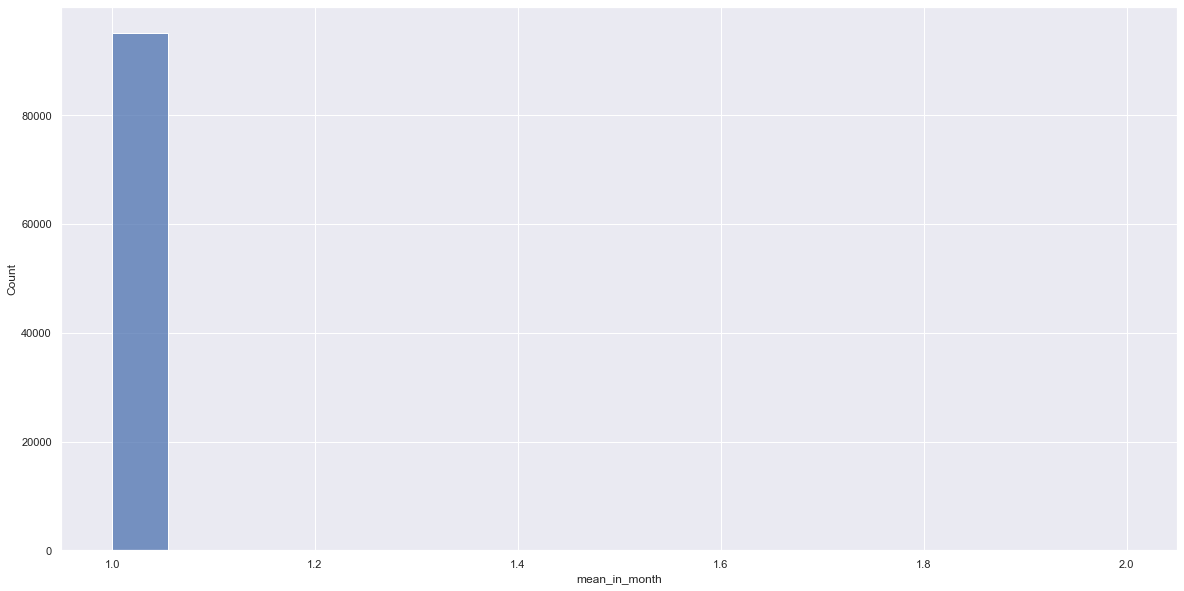

In [71]:
sns.histplot(mean_count_of_orders_by_users.mean_in_month)

## RFM-сегментация

Объединим таблицы

In [72]:
merged = items.merge(orders, on = 'order_id', how = 'inner')

In [73]:
merged.shape

(112650, 14)

In [74]:
full_merged = merged.merge(customer, on = 'customer_id')

In [75]:
full_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [76]:
full_merged_ranged = full_merged.query('order_purchase_timestamp >= "2017-01-01" & order_purchase_timestamp <= "2017-12-31"')

In [77]:
full_merged_ranged_delivered = full_merged_ranged[full_merged_ranged['order_status'] == 'delivered']

Отберём нужные столбцы

In [78]:
df = full_merged_ranged_delivered[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'price']]

In [79]:
df.head()

,customer_unique_id,order_id,order_purchase_timestamp,price
0,871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,58.9
1,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,239.9
4,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,199.9
5,85c835d128beae5b4ce8602c491bf385,00048cc3ae777c65dbb7d2a0634bc1ea,2017-05-15 21:42:34,21.9
6,635d9ac1680f03288e72ada3a1035803,00054e8431b9d7675808bcb819fb4a32,2017-12-10 11:53:48,19.9


In [80]:
df.isna().sum()

customer_unique_id          0
order_id                    0
order_purchase_timestamp    0
price                       0
dtype: int64

In [81]:
df['order_id'].value_counts().head()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
73c8ab38f07dc94389065f7eba4f297a    14
Name: order_id, dtype: int64

Cгруппируем данные, так как запись позиций в заказе ведётся построчно

In [82]:
df_orders = df.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id']) \
                                            .agg({'price': lambda x: x.sum()}).reset_index()

In [83]:
df_orders.head()

,order_id,order_purchase_timestamp,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.9
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.9
2,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.9
3,00048cc3ae777c65dbb7d2a0634bc1ea,2017-05-15 21:42:34,85c835d128beae5b4ce8602c491bf385,21.9
4,00054e8431b9d7675808bcb819fb4a32,2017-12-10 11:53:48,635d9ac1680f03288e72ada3a1035803,19.9


Определим дату последнего совершённого заказа и зададим период 

In [84]:
NOW = df_orders['order_purchase_timestamp'].max() + datetime.timedelta(days=1)
NOW

Timestamp('2017-12-31 23:53:28')

In [85]:
period = 365

Посчитаем разницу между датой заказа и нынешней

In [86]:
df_orders['DaysSinceOrder'] = df_orders['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

In [87]:
df_orders.head()

,order_id,order_purchase_timestamp,customer_unique_id,price,DaysSinceOrder
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.9,109
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.9,249
2,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.9,330
3,00048cc3ae777c65dbb7d2a0634bc1ea,2017-05-15 21:42:34,85c835d128beae5b4ce8602c491bf385,21.9,230
4,00054e8431b9d7675808bcb819fb4a32,2017-12-10 11:53:48,635d9ac1680f03288e72ada3a1035803,19.9,21


Посчитаем Recency и Frequency

In [88]:
rfm = df_orders.groupby('customer_unique_id', as_index = False) \
                                .agg({'DaysSinceOrder': lambda x: x.min(),
                                      'order_purchase_timestamp':    lambda x: len([d for d in x if d >= NOW - datetime.timedelta(days=period)])})
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency'}, inplace=True)
rfm.head()

,customer_unique_id,Recency,Frequency
0,0000f46a3911fa3c0805444483337064,296,1
1,0000f6ccb0745a6a4b88665a16c9f078,80,1
2,0004aac84e0df4da2b147fca70cf8255,47,1
3,0005e1862207bf6ccc02e4228effd9a0,302,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1


Лямбда функцией считаем Monetary

In [89]:
rfm['Monetary'] = rfm['customer_unique_id'].apply(lambda x: df_orders[(df_orders['customer_unique_id'] == x) & \
                                                           (df_orders['order_purchase_timestamp'] >= NOW - datetime.timedelta(days = period))]\
                                                           ['price'].sum())
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000f46a3911fa3c0805444483337064,296,1,69.00
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,13.90


Посчитаем квантили для определения категории пользователя по рассматриваемому признаку

In [90]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 37.0, 0.4: 91.0, 0.6: 155.0, 0.8: 230.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 68.9, 0.6: 107.98, 0.8: 179.9}}

In [91]:
# Функция для присвоения номера признака Recency

def r_score(x):                  
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

# Функция для присвоения номера признакам Frequency, Monetary    
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [92]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [93]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,0000f46a3911fa3c0805444483337064,296,1,69.00,1,1,3
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99,4,1,1
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00,4,1,5
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,13.90,2,1,1


Строчно суммируем значения столбцов R, F, M в новый столбец RFM

In [94]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000f46a3911fa3c0805444483337064,296,1,69.00,1,1,3,113
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99,4,1,1,411
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00,4,1,5,415
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4,114
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,13.90,2,1,1,211


In [95]:
rfm['RFM Score'].unique()

array(['113', '411', '415', '114', '211', '413', '313', '311', '511',
       '315', '215', '314', '112', '115', '214', '414', '312', '513',
       '111', '515', '412', '512', '514', '212', '213', '153', '555',
       '155', '554', '455', '452', '252', '255', '355', '454', '353',
       '254', '453', '253', '154', '354', '553', '352', '152', '552',
       '351', '451', '251', '151', '551'], dtype=object)

Исходя из здравого смысла и логических соображений присвоим числовым категориям смысловое название сегмента

In [96]:
segt_map = {
    r'[1-2][1-2]': 'пасивный',
    r'[1-2][3-4]': 'в зоне риска',
    r'[1-2]5': 'в ожидании нового продукта',
    r'[1-2]5[3-5]': 'разочаровался',
    r'3[1-2]': 'собирается спать',
    r'33': 'требует внимания',
    r'[3-4][4-5]': 'лояльный покупатель',
    r'41': 'перспективный',
    r'51': 'новый покупатель',
    r'[4-5][2-3]': 'потенциальный лояльный клиент',
    r'5[4-5]': 'чемпионы'}

In [97]:
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000f46a3911fa3c0805444483337064,296,1,69.00,1,1,3,113,пасивный
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99,4,1,1,411,перспективный
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00,4,1,5,415,перспективный
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4,114,пасивный
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,13.90,2,1,1,211,пасивный


In [98]:
rfm.Segment.unique()

array(['пасивный', 'перспективный', 'собирается спать',
       'новый покупатель', 'в ожидании нового продукта', 'чемпионы',
       'лояльный покупатель'], dtype=object)

Строим столбчатую диаграмму для визуализации частотности сегментов

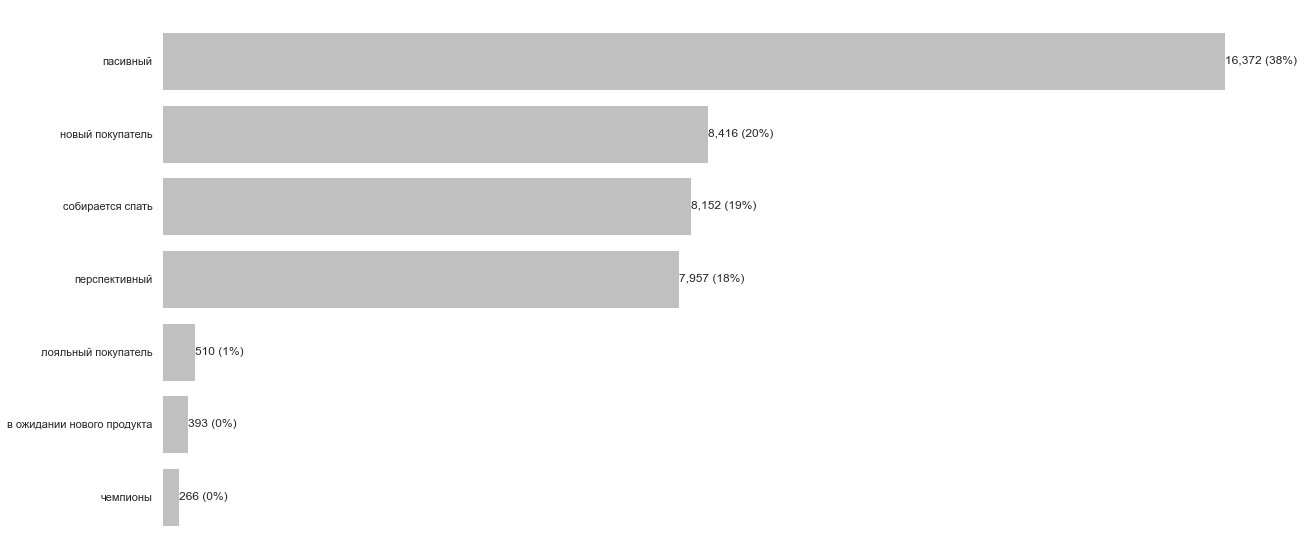

In [99]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()